In [21]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

plt.rc('axes', axisbelow=True)

In [41]:
with open('rotation3D.pickle', 'rb') as f:
    df = pickle.load(f)
df['rotDeg'] = df.apply(lambda x: str((int(x['xDeg']), int(x['yDeg']), int(x['zDeg']))), axis=1)
df['upErr'] = df.apply(lambda x: x['bcd'] - x['upCI'], axis=1)  # Mislabelled in data collection
df['lowErr'] = df.apply(lambda x: x['lowCI'] - x['bcd'], axis=1)  # Mislabelled in data collection
df.head()

,xDeg,yDeg,zDeg,r2,bcd,upCI,lowCI,upDom,lowDom,rotDeg,upErr,lowErr
0,0.0,0.0,0.0,0.999436,2.134578,2.041384,2.227772,-0.160827,0.343660,"(0, 0, 0)",0.093194,0.093194
1,0.0,0.0,30.0,0.999704,2.285623,2.213409,2.357836,-0.541014,-0.031100,"(0, 0, 30)",0.072213,0.072213
2,0.0,0.0,60.0,0.999765,2.279600,2.215339,2.343862,-0.541014,-0.031100,"(0, 0, 60)",0.064262,0.064262
3,0.0,0.0,90.0,0.999147,2.127435,2.013243,2.241628,-0.282249,0.217615,"(0, 0, 90)",0.114193,0.114193
4,0.0,0.0,120.0,0.999715,2.280391,2.209595,2.351186,-0.541014,-0.031100,"(0, 0, 120)",0.070795,0.070795


In [25]:
df[df['bcd'] < 2.25][df['xDeg'] != 90.0]

/tmp/ipykernel_26861/1620669958.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['bcd'] < 2.25][df['xDeg'] != 90.0]


,xDeg,yDeg,zDeg,r2,bcd,upCI,lowCI,upDom,lowDom,rotDeg
0,0.0,0.0,0.0,0.999436,2.134578,2.041384,2.227772,-0.160827,0.343660,"(0.0, 0.0, 0.0)"
3,0.0,0.0,90.0,0.999147,2.127435,2.013243,2.241628,-0.282249,0.217615,"(0.0, 0.0, 90.0)"
18,0.0,90.0,0.0,0.999436,2.134578,2.041384,2.227772,-0.160827,0.343660,"(0.0, 90.0, 0.0)"
21,0.0,90.0,90.0,0.999436,2.134578,2.041384,2.227772,-0.160827,0.343660,"(0.0, 90.0, 90.0)"
56,30.0,90.0,60.0,0.999436,2.134578,2.041384,2.227772,-0.160827,0.343660,"(30.0, 90.0, 60.0)"
59,30.0,90.0,150.0,0.999147,2.127435,2.013243,2.241628,-0.282249,0.217615,"(30.0, 90.0, 150.0)"
91,60.0,90.0,30.0,0.999436,2.134578,2.041384,2.227772,-0.160827,0.343660,"(60.0, 90.0, 30.0)"
94,60.0,90.0,120.0,0.999147,2.127435,2.013243,2.241628,-0.282249,0.217615,"(60.0, 90.0, 120.0)"
164,120.0,90.0,60.0,0.999147,2.127435,2.013243,2.241628,-0.282249,0.217615,"(120.0, 90.0, 60.0)"
167,120.0,90.0,150.0,0.999147,2.127435,2.013243,2.241628,-0.282249,0.217615,"(120.0, 90.0, 150.0)"


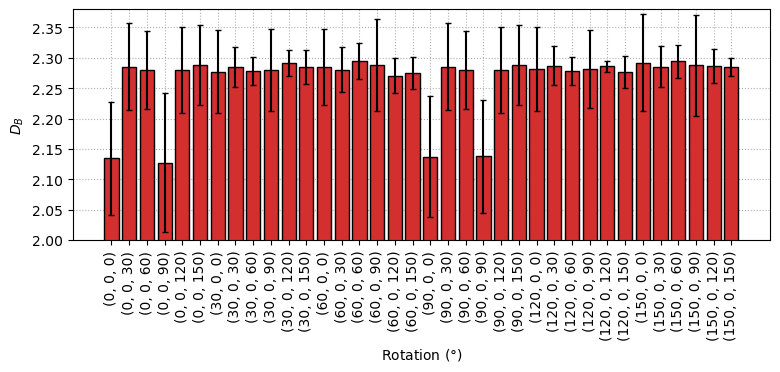

In [66]:
dfSubset = df[df['yDeg'] == 0.0]  # [df['yDeg'] == 0.0]
bcdCIs = np.concatenate((np.array(dfSubset['lowErr']).reshape(1, -1), np.array(dfSubset['upErr']).reshape(1, -1)), axis=0)

fig = plt.figure(figsize=(9, 3))
plt.bar(x=[str(i) for i in dfSubset['rotDeg']], height=dfSubset['bcd'], yerr=bcdCIs,
        width=0.8, align='center', edgecolor='k', linewidth=1.0, color='#D32F2F', capsize=2.5)
plt.xlabel(r'Rotation ($\degree$)')
plt.ylabel(r'$D_B$')
plt.xticks(rotation=90, ha='center')
plt.ylim(2.00, 2.38)
plt.grid(linestyle='dotted')
plt.savefig('outlierNProtation.png', bbox_inches='tight')